<a href="https://colab.research.google.com/github/NeveChrono/ML_CodeDump/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

It can be thought of as an extended version of linear regression. In here instead of doing analysis of just one feature we do analysis of multiple features and what their affects will be on the output. As in any real life example the output cna be affected by many factors.

For eg:- We have a company annual profit data with us.

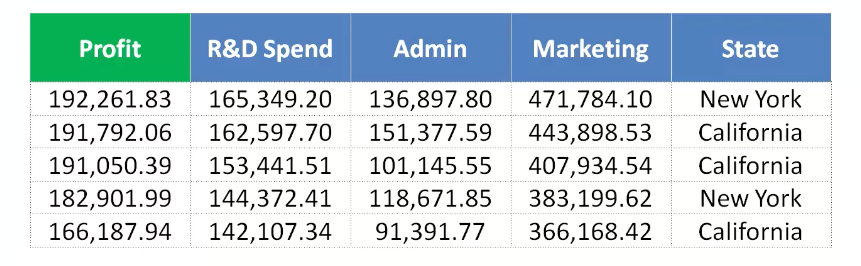

From here we can make out that the output which is the profit is influenced by many factors such as:-


*   R & D spend
*   Admin Spend
*   Marketing Spend
*   Which state the company is located.

In such cases focusing on relationship btw profit and any one of the factors and constructing our model based on it wont be as effective as this will lead to bias. To avoid this we introduced the concept of multiple linear regression. Which focuses on how each factor has an influence on the over all profit that a company can make.

This mathematically speaking can be defined as:-

Profit = b0 + b1 * R&D + b2 * Admin + b3 * Marketing + b4 * State

where in b0,b1,b2,b3 are all constants as this equation will help us give a more accurate description of how to each value affects the profits made by the company.

Here in the above table u might have notice that every column is numerical value except for the state one which can cause confusion as mathematically speaking we cant use words in our equation to find the numerical value of profit. As the word New York has no meaning mathematically.

So to give some mathematical meaning to these States which are categorical value we use the idea of **Dummy Variable**.

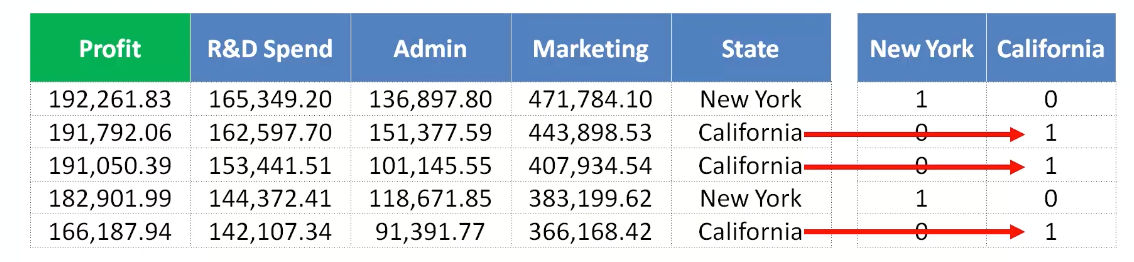

These can be used to encode categorical value by futher dividing the column of state into sub columns like New York , California etc and in which if a row has the state value as that particular column value it will be counted as 1 or else 0 if it is not.




---

# Handling Categorical Variables with Dummy Variables

When building regression models, it's common to encounter categorical text values. To include these in our model, we need to convert them into a numerical format. This allows us to use them as parameters in our regression equation.

For instance, consider the following regression equation:

**Profit = b0 + b1 * R&D + b2 * Admin + b3 * Marketing + b4 * NewYork**

### Why Only Include "New York"?

In this example, we only have two categories in the "State" column: New York and California. To represent these two categories numerically, we can use a binary (0 or 1) encoding:

- **New York** is represented as 1.
- **California** is represented as 0.

By doing this, we effectively use one variable ("New York") to distinguish between the two states. If the value is 1, the state is New York; if it is 0, the state is California. This method allows us to incorporate both state values into the model without adding unnecessary complexity.

### The Dummy Variable Trap

If we were to include both "New York" and "California" as separate dummy variables, we would introduce multicollinearity. This means there would be a perfect linear relationship between the two dummy variables, as one can be derived from the other:

- For example, if **New York = 1**, then **California** must be **0** (and vice versa).

In mathematical terms, this creates a dependency between the parameters, making the model confused about the influence of each state. This is known as the **Dummy Variable Trap**.

### How to Avoid the Dummy Variable Trap

To prevent this issue, we should always use **n - 1** dummy variables for a categorical feature with **n** categories. This ensures that our model remains interpretable and free from redundancy:

- For the "State" example, we have 2 categories (New York and California), so we use **2 - 1 = 1** dummy variable ("New York").

If your dataset includes multiple categorical columns, apply this rule to each set of categories individually.

By following this practice, we avoid multicollinearity and ensure our regression models are accurate and effective.



---

# Statistical Significance

Statistical significance helps determine if the results we observe in a study or experiment have any meaningful implications or are likely due to random chance.

## Understanding Statistical Significance

Consider a scenario where you predict that the chance of an event occurring is 10%. To understand if this prediction is statistically significant, we ask: **"Is the result meaningful or could it have happened by random chance?"** This uncertainty can be quantified using a **p-value**.

### What is a P-Value?

The **p-value** measures the probability of obtaining a result at least as extreme as the one observed, assuming that a certain assumption (like the null hypothesis) is true. In simpler terms, it indicates how likely it is that the observed result occurred by chance.

#### Example: Tossing a Fair Coin

Imagine tossing a fair coin multiple times and observing the outcome:

- **P-value for 1 head**: 0.50
- **P-value for 2 heads**: 0.25
- **P-value for 3 heads**: 0.12
- **P-value for 4 heads**: 0.06  
- ...and so on.

If we observe 4 heads in a row, the p-value is 0.06, meaning there is a 6% chance of this outcome happening by random chance if the coin is fair.

### Interpreting Statistical Significance

Statistical significance is about determining a "threshold" for comfort. For example, you might decide that any p-value less than 0.05 indicates statistical significance. If the p-value is below this threshold, we conclude that the result is unlikely due to random chance, and there might be something more meaningful happening.

Using the coin toss example, if we observe an outcome with a p-value below 0.06 and we set our threshold at 0.05, we may feel comfortable concluding that the result is statistically significant and not just due to a fair coin's randomness.

### Practical Implication

**TL;DR**: Statistical significance helps us decide if the results we observe are due to chance or reflect a real effect. If our observed results occur frequently under the assumption of randomness (high p-value), we are less likely to conclude that our hypothesis (like the coin being fair) is incorrect. However, if the results are unlikely to occur by chance (low p-value), we might reject our initial assumption.

Typically, researchers use confidence levels like **95% confidence** (p-value < 0.05) to determine if the results are statistically significant.



---

# How to Build a Multiple Regression Model

Building a multiple regression model can be challenging due to the presence of multiple dependencies. Incorporating all field values may increase the model's complexity, potentially leading to an ineffective model. However, you can avoid this by using one of the following five methods:

## 1. All-In Case
- **Description**: Use all variables in the model, typically due to prior knowledge of their importance or because you are compelled to include them.
- **When to Use**: When you have strong reasons to believe that all variables contribute meaningfully to the model.

## 2. Backward Elimination
- **Description**: This is the fastest method for refining a model. It starts with all variables and iteratively removes the one with the highest p-value.
- **Steps**:
  1. Remove the variable with the highest p-value.
  2. Rebuild the model without this variable.
  3. Check if the highest p-value in the new model is still greater than the significance level.
  4. Repeat steps 1-3 until all variables have p-values less than the significance level.

## 3. Forward Elimination
- **Description**: This method is the reverse of backward elimination. It starts with no variables and adds them one at a time.
- **Steps**:
  1. Perform linear regression using each field individually.
  2. Identify the field with the lowest p-value.
  3. Add this field to the model and rebuild it.
  4. Check the p-value of the added field.
  5. Repeat steps 1-4 until no additional fields have p-values lower than the significance level.

## 4. Bi-Directional Elimination
- **Description**: Also known as stepwise regression, this method combines both forward and backward elimination. It adds and removes variables simultaneously based on their p-values.
- **When to Use**: When you want a more dynamic approach that considers both inclusion and exclusion of variables during model building.

## 5. Score Comparison
- **Description**: This resource-heavy method evaluates all possible models against a specific criterion, such as Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC).
- **Steps**:
  1. Generate all possible models.
  2. Compare models based on the chosen criteria.
  3. Select the model that best fits the data.

---

By following these methods, you can build a more efficient and reliable multiple regression model that effectively captures the relationships within your data.

# Code

In [10]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Importing the dataset
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [43]:
# Encoding Categorical Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)



[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [40]:
# To avoid the Dummy Variable Trap
# X = X[:,1:]

In [29]:
# Spiltting the Dataset in to Train and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [44]:
''' To train the Multiple Regression Model is the same as for Linear Regression
with the class taking care of the dummy variable trap and how it will use backward elimination
to create the model
'''

from sklearn.linear_model import LinearRegression
lr  = LinearRegression();
lr.fit(X_train,Y_train);

In [45]:
# Predicting the Results using two vectors one was predicted profit and actual profit
Y_pred = lr.predict(X_test)

#set the prescision
np.set_printoptions(precision=2)

# concate both together to be displayed side by side
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [46]:
print(lr.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$1, 0, 0, 160000, 130000, 300000 \rightarrow \textrm{scalars}$

$[1, 0, 0, 160000, 130000, 300000] \rightarrow \textrm{1D array}$

$[[1, 0, 0, 160000, 130000, 300000]] \rightarrow \textrm{2D array}$

**Important note 2:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

## Getting the final linear regression equation with the values of the coefficients

In [47]:
print(lr.coef_)
print(lr.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

---

# Multiple Linear Regression with Backward Elimination

## Code Walkthrough

### 1. Importing Libraries

```python
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
```

- **numpy**: For numerical operations and handling arrays.
- **pandas**: For data manipulation and analysis.
- **statsmodels**: For performing Ordinary Least Squares (OLS) regression and statistical analysis.
- **sklearn.compose.ColumnTransformer**: For applying transformations to specific columns.
- **sklearn.preprocessing.OneHotEncoder**: For encoding categorical variables into dummy variables.
- **sklearn.model_selection.train_test_split**: For splitting the dataset into training and test sets.

### 2. Load the Dataset

```python
dataset = pd.read_csv("50_Startups.csv")
```

- **pd.read_csv("50_Startups.csv")**: Loads the dataset from a CSV file into a DataFrame.

### 3. Extract Features and Target Variable

```python
X = dataset.iloc[:, :-1].values  # Features
Y = dataset.iloc[:, -1].values   # Target
```

- **X**: Extracts all columns except the last one as features (independent variables).
- **Y**: Extracts the last column as the target variable (dependent variable).

### 4. Encode Categorical Data

```python
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
```

- **ColumnTransformer**: Applies OneHotEncoder to the 4th column (index 3), which is categorical.
- **OneHotEncoder**: Encodes the categorical variable into dummy variables (binary indicators).

### 5. Avoid Dummy Variable Trap

```python
X = X[:, 1:]  # Remove the first column of dummy variables
```

- **Remove the first column**: Avoids the dummy variable trap by removing one of the dummy variables to prevent multicollinearity.

### 6. Add Intercept Column

```python
X = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values = X, axis = 1)
```

- **Add intercept column**: Adds a column of ones to the feature matrix \( X \) to account for the intercept term in the regression model.

### 7. Convert to Numeric Type

```python
X = np.array(X, dtype=np.float64)
```

- **Convert to float64**: Ensures that all values in \( X \) are in numeric format, handling any potential data type issues.

### 8. Split the Dataset

```python
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
```

- **train_test_split**: Splits the dataset into training and test sets with 20% of the data reserved for testing. The random_state parameter ensures reproducibility.

### 9. Define Backward Elimination Function

```python
def backward_elimination(X, Y, significance_level = 0.05):
    num_vars = X.shape[1]
    for i in range(num_vars):
        regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
        p_values = regressor_OLS.pvalues
        max_p_value = max(p_values)
        if max_p_value > significance_level:
            max_p_value_index = p_values.tolist().index(max_p_value)
            X = np.delete(X, max_p_value_index, 1)
        else:
            break
    return X
```

- **backward_elimination**: Function to perform backward elimination. It fits an OLS model, removes the predictor with the highest p-value if it exceeds the significance level (0.05), and repeats until all p-values are below the threshold.

### 10. Perform Backward Elimination on Training Data

```python
X_train_opt = backward_elimination(X_train, Y_train)
```

- **Apply backward elimination**: Optimizes the feature set for the training data by removing non-significant predictors.

### 11. Fit the Model with Optimal Features

```python
regressor_OLS = sm.OLS(endog = Y_train, exog = X_train_opt).fit()
print(regressor_OLS.summary())
```

- **Fit OLS Model**: Fits the Ordinary Least Squares model using the optimized feature set.
- **Print summary**: Outputs the model summary, including coefficients, p-values, R-squared, and other statistics.

### 12. Prepare the Test Set for Prediction

```python
X_test_opt = np.append(arr = np.ones((X_test.shape[0], 1)).astype(int), values = X_test, axis = 1)
X_test_opt = X_test_opt[:, :X_train_opt.shape[1]]
```

- **Add intercept column to test set**: Similar to the training set, adds a column of ones to the test set.
- **Align columns**: Ensures that the test set has the same feature columns as the training set.

### 13. Make Predictions

```python
Y_pred = regressor_OLS.predict(X_test_opt)
```

- **Predict**: Uses the optimized model to make predictions on the test set.

### 14. Print Predictions and Actual Values

```python
print("Predicted values:", Y_pred[:5])
print("Actual values:", Y_test[:5])
```

- **Print results**: Displays the first few predicted and actual values for comparison.

---


In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv("50_Startups.csv")

# Extract features and target variable
X = dataset.iloc[:, :-1].values  # Features
Y = dataset.iloc[:, -1].values   # Target

# Encode categorical data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Avoid the dummy variable trap by removing one dummy variable
X = X[:, 1:]  # Remove the first column of dummy variables

# Add an intercept column (a column of ones) to the feature matrix X
X = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values = X, axis = 1)

# Convert all values in X to numeric, handling potential errors
X = np.array(X, dtype=np.float64)

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Backward Elimination
def backward_elimination(X, Y, significance_level = 0.05):
    num_vars = X.shape[1]
    for i in range(num_vars):
        regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
        p_values = regressor_OLS.pvalues
        max_p_value = max(p_values)
        if max_p_value > significance_level:
            max_p_value_index = p_values.tolist().index(max_p_value)
            X = np.delete(X, max_p_value_index, 1)
        else:
            break
    return X

# Perform backward elimination on the training data
X_train_opt = backward_elimination(X_train, Y_train)

# Fit the model with the optimal features
regressor_OLS = sm.OLS(endog = Y_train, exog = X_train_opt).fit()

# Output the summary of the final model
print("OLS Regression Results on Training Data:")
print(regressor_OLS.summary())

# Prepare the test set for prediction
# Add an intercept column to the test set
X_test_opt = np.append(arr = np.ones((X_test.shape[0], 1)).astype(int), values = X_test, axis = 1)

# Align the columns of X_test_opt to match X_train_opt
# Select columns of X_test_opt that are present in X_train_opt
X_test_opt = X_test_opt[:, :X_train_opt.shape[1]]

# Make predictions
Y_pred = regressor_OLS.predict(X_test_opt)

# Evaluate the model performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print first few predictions and actual values for comparison
print("Predicted values:", Y_pred[:5])
print("Actual values:", Y_test[:5])
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Fit a multiple linear regression model using sklearn
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Predict using the sklearn model
Y_pred_sklearn = lin_reg.predict(X_test)

# Evaluate the sklearn model performance
mse_sklearn = mean_squared_error(Y_test, Y_pred_sklearn)
r2_sklearn = r2_score(Y_test, Y_pred_sklearn)

print("Predicted values (sklearn):", Y_pred_sklearn[:5])
print("Actual values (sklearn):", Y_test[:5])
print("Mean Squared Error (sklearn):", mse_sklearn)
print("R-squared (sklearn):", r2_sklearn)


OLS Regression Results on Training Data:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     652.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.56e-25
Time:                        06:36:47   Log-Likelihood:                -423.09
No. Observations:                  40   AIC:                             850.2
Df Residuals:                      38   BIC:                             853.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      